In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import tsfresh
import json
import datetime
from model import *

In [2]:
data = pd.read_excel('project_3_train+test.xlsx', index_col='Date')

In [3]:
train = data.iloc[:357]
test = data.iloc[357:]

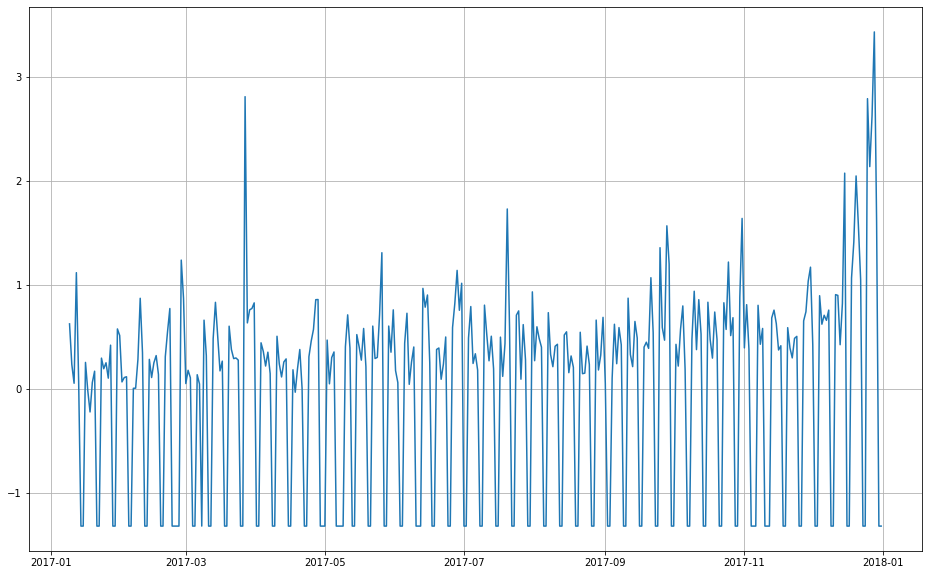

In [4]:
plt.figure(figsize=(16,10))
plt.plot(train)
plt.grid()
plt.show()

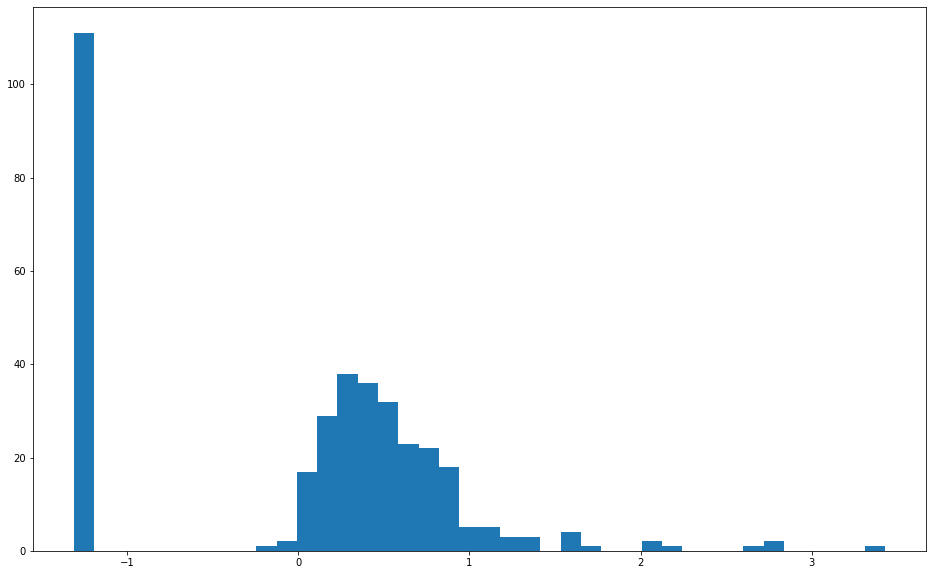

In [5]:
plt.figure(figsize=(16,10))
plt.hist(train.values, bins=40)
plt.show()

Столбец слева и сильнейшие колебания в отрицательные значения говорят о том, что что-то не так.

Если заглянуть в файл и календарь, то можно увидеть, что это одно и то же значение и оно стоит на выходном дне.

Поэтому удалим эти данные.

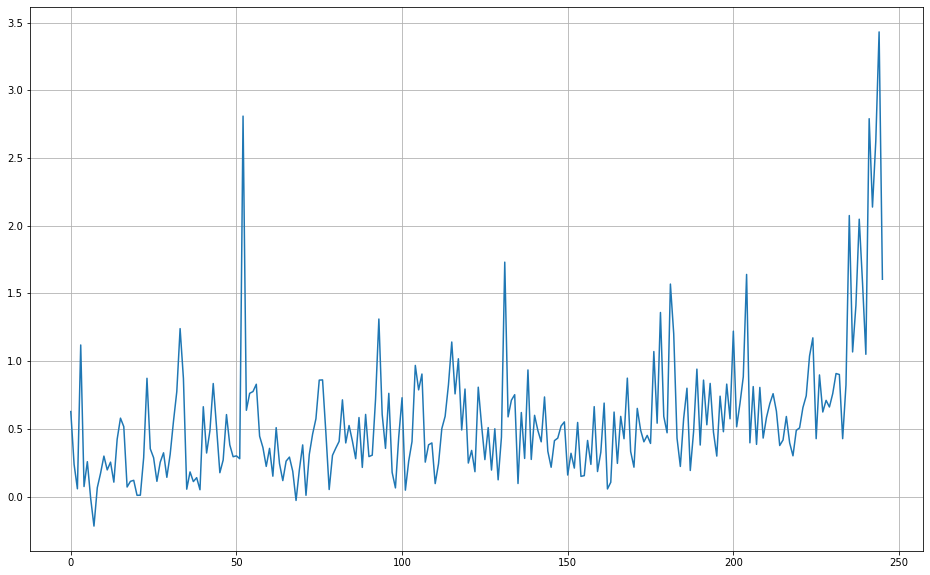

In [6]:
plt.figure(figsize=(16,10))
plt.plot(train['Target'].values[train['Target'] != train['Target'].values.min()])
plt.grid()
plt.show()

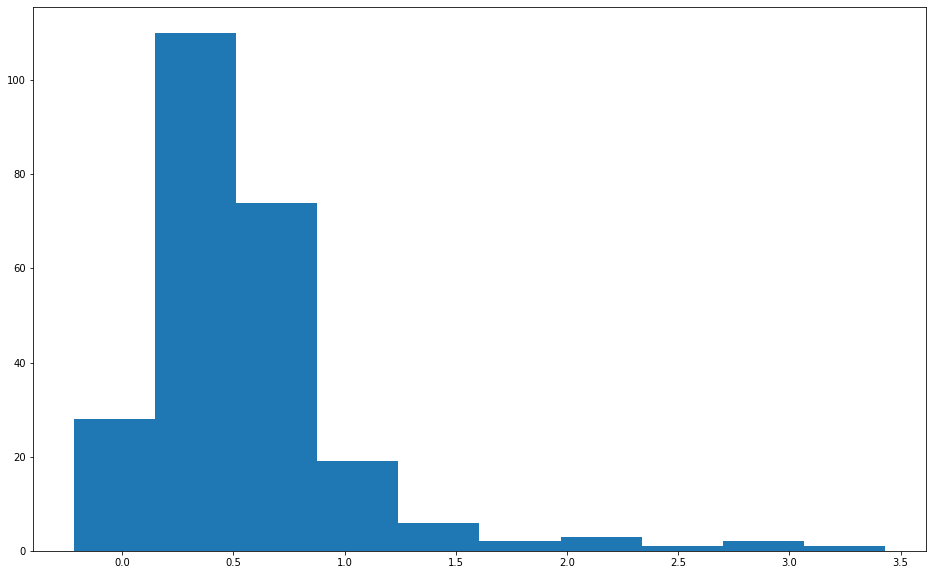

In [7]:
plt.figure(figsize=(16,10))
plt.hist(train['Target'].values[train['Target'] != train['Target'].values.min()])
plt.show()

Уже лучше. Переобозначим данные. Надо бы подумать, какое это распределение

In [8]:
data = data[data['Target'] != data['Target'].min()]
train = train[train['Target'] != train['Target'].min()]
test = test[test['Target'] != test['Target'].min()]

Посмотрим, как у нас со скользящим средним.

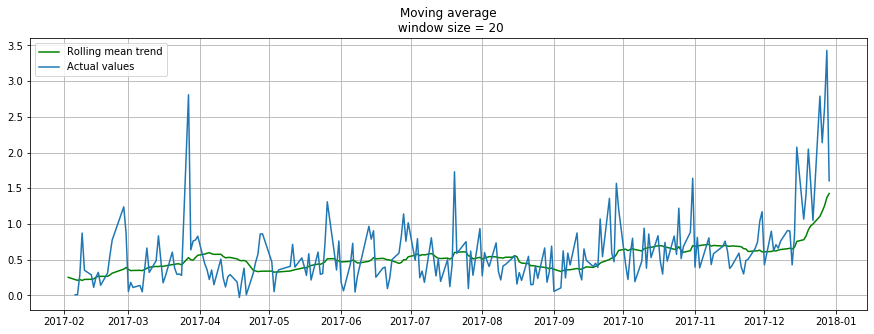

In [10]:
plotMovingAverage(train, train['Target'], 20)

В конце намечается какой-то тренд. Посмотрим на все данные.

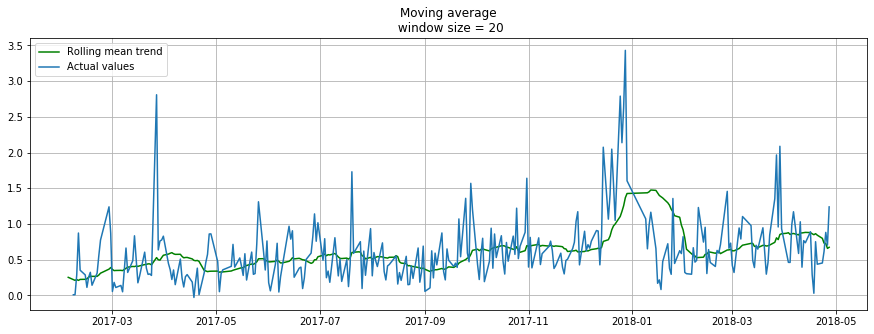

In [14]:
plotMovingAverage(data, data['Target'], 20)

Видим, что ликвидность нарастает к концу года, а в начале года она спадает и возвращается к прежней форме.

In [24]:
sc.stats.kstest(train['Target'], 'norm')

KstestResult(statistic=0.49459162269519086, pvalue=4.378906008220171e-56)

In [ ]:
poisson_test = [sc.stats.kstest(train['Target'], sc.stats.poisson.cdf) for i in range(1,len(train))]
poisson_test

In [ ]:
fisher_test = [sc.stats.kstest(train['Target'], sc.stats.fisher.cdf) for i in range(1,len(train))]
fisher_test

Тут я что-то про итоги теста скажу

TypeError: _parse_args() missing 1 required positional argument: 'mu'

# Feature engineering

In [12]:
train

,Target
Date,
2017-01-09,0.627938
2017-01-10,0.238050
2017-01-11,0.057763
2017-01-12,1.119530
2017-01-13,0.074451
...,...
2017-12-25,2.790113
2017-12-26,2.137712
2017-12-27,2.625104


In [13]:
train['quarter'] = train.index.quarter
test['quarter'] = test.index.quarter

train['month'] = train.index.month
test['month'] = test.index.month

train['week'] = train.index.week
test['week'] = test.index.week

train['weekday'] = train.index.weekday
test['weekday'] = test.index.weekday

# Бизнес-логика

# Anomaly detection

# Feature selection